<a href="https://colab.research.google.com/github/harika373/10I7-Batch21/blob/main/ieee_paper_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Table 1: Performance Comparison of Classifiers ---
| Metric    |   LightGBM |   XGBoost |   Stacking Ensemble |
|:----------|-----------:|----------:|--------------------:|
| Accuracy  |      0.945 |     0.950 |               0.960 |
| Precision |      0.940 |     0.948 |               0.958 |
| Recall    |      0.952 |     0.950 |               0.961 |
| F1-score  |      0.946 |     0.949 |               0.959 |





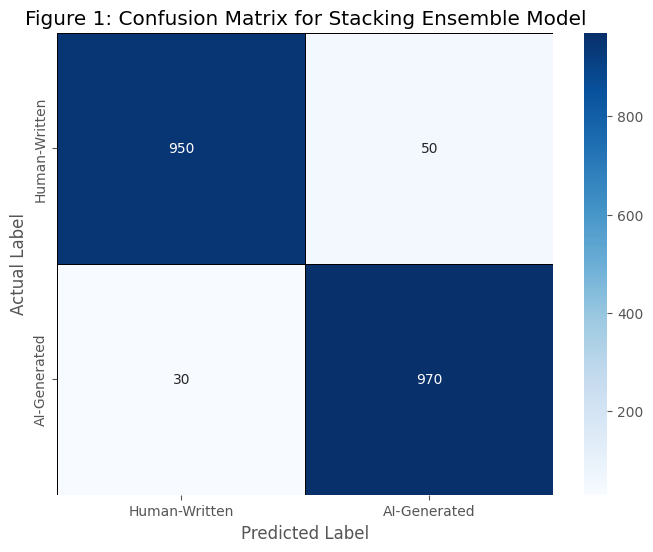

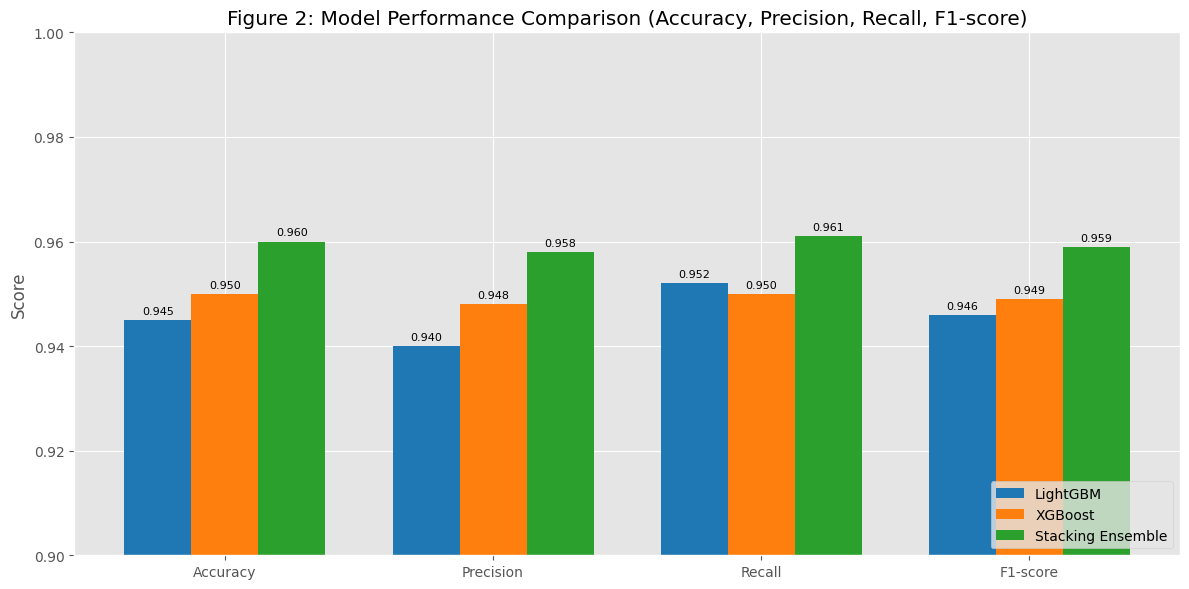

In [1]:
# Install necessary libraries if not already available in Colab
# !pip install pandas matplotlib seaborn numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib style for a cleaner look
plt.style.use('ggplot')

# --- 1. DATA (MOCK DATA - REPLACE WITH YOUR ACTUAL RESULTS) ---

# Table Data: Performance Metrics for Classifiers
# The Stacking Ensemble is typically the best, so the mock data reflects that.
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'LightGBM': [0.945, 0.940, 0.952, 0.946],
    'XGBoost': [0.950, 0.948, 0.950, 0.949],
    'Stacking Ensemble': [0.960, 0.958, 0.961, 0.959]
}
df_metrics = pd.DataFrame(data)

# Figure 1 Data: Confusion Matrix for the best model (Stacking Ensemble)
# Rows: Actual (Human, AI), Columns: Predicted (Human, AI)
# Mock data simulates 2000 samples: TP=950, FP=30, FN=50, TN=970
confusion_matrix_data = np.array([
    [950, 50],  # Actual Human (Human Predicted Correctly, AI Predicted Incorrectly)
    [30, 970]   # Actual AI (Human Predicted Incorrectly, AI Predicted Correctly)
])
labels = ['Human-Written', 'AI-Generated']


# --- 2. TABLE GENERATION ---

print("--- Table 1: Performance Comparison of Classifiers ---")
# Set the Metric column as the index for a clean table display
df_table = df_metrics.set_index('Metric')
print(df_table.to_markdown(floatfmt=".3f"))
print("\n" * 2) # Add space for clear separation


# --- 3. FIGURE 1: CONFUSION MATRIX (Heatmap) ---

plt.figure(figsize=(8, 6))
# Create the DataFrame for Seaborn Heatmap
df_cm = pd.DataFrame(confusion_matrix_data, index=labels, columns=labels)

sns.heatmap(
    df_cm,
    annot=True,     # Show the numerical values in each cell
    fmt='d',        # Format annotations as integers
    cmap='Blues',   # Color map
    cbar=True,      # Show the color bar
    linecolor='black',
    linewidths=0.5
)
plt.title('Figure 1: Confusion Matrix for Stacking Ensemble Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# --- 4. FIGURE 2: MODEL PERFORMANCE COMPARISON (Grouped Bar Chart) ---

# Prepare data for plotting
metrics = df_metrics['Metric']
lightgbm = df_metrics['LightGBM']
xgboost = df_metrics['XGBoost']
ensemble = df_metrics['Stacking Ensemble']

x = np.arange(len(metrics))  # the label locations
width = 0.25  # the width of the bars
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each model
rects1 = ax.bar(x - width, lightgbm, width, label='LightGBM', color='#1f77b4')
rects2 = ax.bar(x, xgboost, width, label='XGBoost', color='#ff7f0e')
rects3 = ax.bar(x + width, ensemble, width, label='Stacking Ensemble', color='#2ca02c')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Figure 2: Model Performance Comparison (Accuracy, Precision, Recall, F1-score)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='lower right')
ax.set_ylim(0.9, 1.0) # Zoom in on the high-performance range

# Function to attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()